<a href="https://colab.research.google.com/github/felipeescorel/redes_neurais/blob/master/SOM/Self_Organising_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Organising Maps Netowork

Segue um código exemplo da rede neural SOM

Para maiores detalhes ver site:
http://blog.yhat.com/posts/self-organizing-maps-2.html

#EXEMPLO COM BIBLIOTECA SOMCLU

Essa biblioteca suporta uso de GPUs e possui implementação super simples

In [0]:
!pip install somoclu
!pip install ipython ipdb

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
import ipdb
%matplotlib inline


In [0]:
# c = np.genfromtxt('mnist_test.csv', delimiter=',')

# c = c[np.lexsort(np.fliplr(c).T)]
# contagem = []
# data = np.float32(c)
# for i in range(10):
#     j = 0
#     for x in data:
#         if x[0] == i:
#             j = j +1
#     contagem.append(j)        
# print(contagem)

# colors = ["red"] * contagem[0]
# colors.extend(["green"] * contagem[1])
# colors.extend(["blue"] * contagem[2])
# colors.extend(["yellow"] * contagem[3])
# colors.extend(["gray"] * contagem[4])
# colors.extend(["purple"] * contagem[5])
# colors.extend(["orange"] * contagem[6])
# colors.extend(["black"] * contagem[7])
# colors.extend(["pink"] * contagem[8])
# colors.extend(["white"] * contagem[9])


# labels = range(np.sum(contagem))
# print(labels)

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
range(0, 10000)


Executando a rede neural SOM

In [0]:
#escolha o tamanho da rede SOM
# n_rows, n_columns = 100, 160
# som = somoclu.Somoclu(n_columns, n_rows, data=data)
# som2 = somoclu.Somoclu(80, 90, data=data)
# som3 = somoclu.Somoclu(50,50, data=data)
# %time som.train()
# %time som2.train()
# %time som3.train()


CPU times: user 45min 54s, sys: 14.6 s, total: 46min 9s
Wall time: 6min 22s
CPU times: user 20min 43s, sys: 7.82 s, total: 20min 51s
Wall time: 2min 58s
CPU times: user 7min 10s, sys: 3.27 s, total: 7min 13s
Wall time: 59.5 s


Visualizar o resultado:

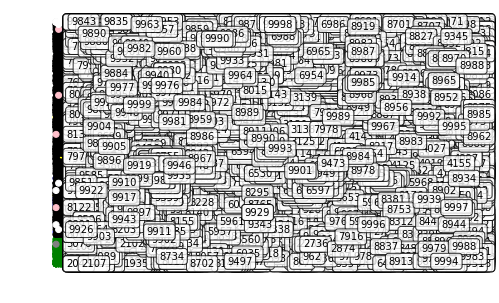

<module 'matplotlib.pyplot' from '/home/felipe/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [0]:
# som.view_component_planes()
# som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

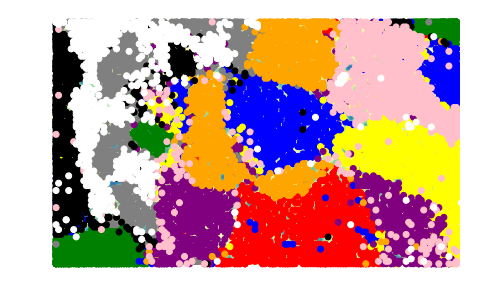

<module 'matplotlib.pyplot' from '/home/felipe/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [0]:
# som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

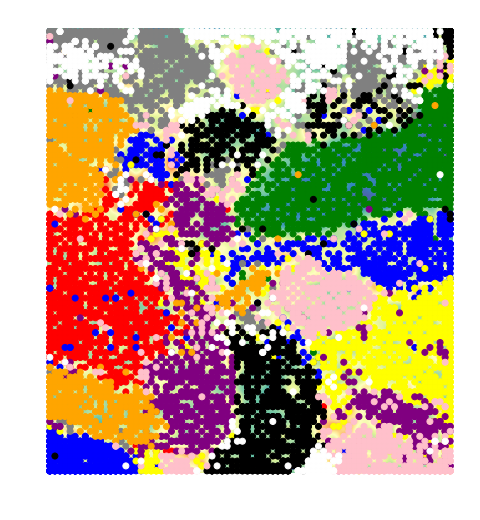

<module 'matplotlib.pyplot' from '/home/felipe/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [0]:
# som2.view_umatrix(bestmatches=True, bestmatchcolors=colors)

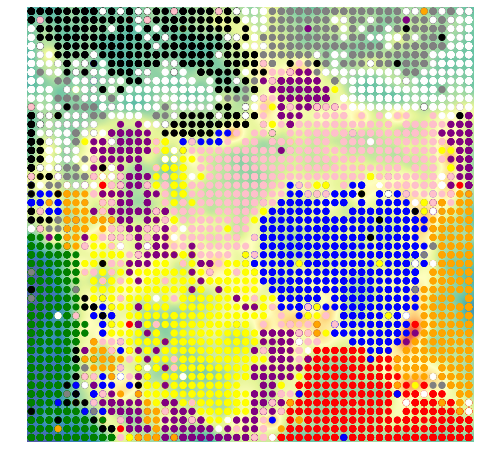

<module 'matplotlib.pyplot' from '/home/felipe/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [0]:
# som3.view_umatrix(bestmatches=True, bestmatchcolors=colors)

#Mini-Projeto 2:

Execute uma das Redes Neurais SOM acima com a base de dados MNist que possui caracteres de 0 a 9. Mostre os resultados abaixo:

1. Mostre 3 configurações de Mapa diferentes
2. Construa a matriz de confusão mostrando o resultado desses mapas (Se tem dúvidas, olhe a aula de Avaliação de resultados da disciplina anterior de Inteligência Artificial)
3. Calcule a taxa de acerto utilizando a matriz de confusão gerada no passo anterior.

DATA DE ENTREGA: 09/04/2019




In [0]:
from tensorflow.examples.tutorials.mnist import input_data
import random as ran
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def train_size(num):
  x_train = mnist.train.images[:num,:]
  y_train = mnist.train.labels[:num,:]
  return x_train, y_train

def test_size(num):
  x_test = mnist.test.images[:num,:]
  y_test = mnist.test.labels[:num,:]
  return x_test, y_test
def display_digit(num):
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [10]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

x_train, y_train = train_size(100)
x_test, y_test = test_size(100)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

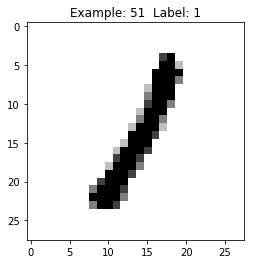

In [11]:
display_digit(ran.randint(0, x_train.shape[0]))

# [**Based on** ](https://https://wonikjang.github.io/deeplearning_unsupervised_som/2017/06/30/som.html)

In [0]:
import tensorflow as tf
import numpy as np
import math

from sklearn.metrics import confusion_matrix
import itertools

In [0]:
classes = ['classe1', 'classe2', 'classe3', 'classe4', 'classe5', 'classe6', 'classe7', 'classe8', 'classe9', 'classe10']

In [0]:
class SOM(object):

    # To check if the SOM has been trained
    trained = False

    def __init__(self, m, n, dim, n_iterations=100, alpha=None, sigma=None):

        # Assign required variables first
        self.m = m; self.n = n
        if alpha is None:
            alpha = 0.2
        else:
            alpha = float(alpha)
        if sigma is None:
            sigma = max(m, n) / 2.0
        else:
            sigma = float(sigma)
        self.n_iterations = abs(int(n_iterations))

        self.graph = tf.Graph()

        with self.graph.as_default():

            # To save data, create weight vectors and their location vectors

            self.weightage_vects = tf.Variable(tf.random_normal( [m * n, dim]) )

            self.location_vects = tf.constant(np.array(list(self.neuron_locations(m, n))))

            # Training inputs

            # The training vector
            self.vect_input = tf.placeholder("float", [dim])
            # Iteration number
            self.iter_input = tf.placeholder("float")

            # Training Operation  # tf.pack result will be [ (m*n),  dim ]

            bmu_index = tf.argmin(tf.sqrt(tf.reduce_sum(tf.pow(
                tf.subtract(self.weightage_vects,
                       tf.stack([self.vect_input for _ in range(m * n)])), 2), 1)), 0) 
                    

            slice_input = tf.pad(tf.reshape(bmu_index, [1]), np.array([[0, 1]]))
            bmu_loc = tf.reshape(tf.slice(self.location_vects, slice_input, 
                        tf.constant(np.array([1, 2]), dtype=tf.int64) ), [2])

            # To compute the alpha and sigma values based on iteration number
            learning_rate_op = tf.subtract(1.0, tf.div(self.iter_input, self.n_iterations))
            alpha_op = tf.multiply(alpha, learning_rate_op)
            sigma_op = tf.multiply(sigma, learning_rate_op)

            # learning rates for all neurons, based on iteration number and location w.r.t. BMU.
            bmu_distance_squares = tf.reduce_sum(tf.pow(tf.subtract(
                self.location_vects, tf.stack( [bmu_loc for _ in range(m * n)] ) ) , 2 ), 1)

            neighbourhood_func = tf.exp(tf.negative(tf.div(tf.cast(
                bmu_distance_squares, "float32"), tf.pow(sigma_op, 2))))
            learning_rate_op = tf.multiply(alpha_op, neighbourhood_func)

            # Finally, the op that will use learning_rate_op to update the weightage vectors of all neurons
            learning_rate_multiplier = tf.stack([tf.tile(tf.slice(
                learning_rate_op, np.array([i]), np.array([1])), [dim]) for i in range(m * n)] )

            ### Strucutre of updating weight ###
            ### W(t+1) = W(t) + W_delta ###
            ### wherer, W_delta = L(t) * ( V(t)-W(t) ) ###

            # W_delta = L(t) * ( V(t)-W(t) )
            weightage_delta = tf.multiply(
                learning_rate_multiplier,
                tf.subtract(tf.stack([self.vect_input for _ in range(m * n)]), self.weightage_vects))

            # W(t+1) = W(t) + W_delta
            new_weightages_op = tf.add(self.weightage_vects, weightage_delta)

            # Update weightge_vects by assigning new_weightages_op to it.
            self.training_op = tf.assign(self.weightage_vects, new_weightages_op)

            self.sess = tf.Session()
            init_op = tf.global_variables_initializer()
            self.sess.run(init_op)

    def neuron_locations(self, m, n):

        for i in range(m):
            for j in range(n):
                yield np.array([i, j])

    def train(self, input_vects):

        # Training iterations
        for iter_no in range(self.n_iterations):
            # Train with each vector one by one
            for input_vect in input_vects:
                self.sess.run(self.training_op, 
                        feed_dict={self.vect_input: input_vect, self.iter_input: iter_no})

        # Store a centroid grid for easy retrieval later on
        centroid_grid = [[] for i in range(self.m)]
        self.weightages = list(self.sess.run(self.weightage_vects))
        self.locations = list(self.sess.run(self.location_vects))
        for i, loc in enumerate(self.locations):
            centroid_grid[loc[0]].append(self.weightages[i])

        self.centroid_grid = centroid_grid

        self.trained = True

    def get_centroids(self):

        if not self.trained:
            raise ValueError("SOM not trained yet")
        return self.centroid_grid

    def map_vects(self, input_vects):

        if not self.trained:
            raise ValueError("SOM not trained yet")

        to_return = []
        for vect in input_vects:
            min_index = min( [i for i in range(len(self.weightages))], 
                            key=lambda x: np.linalg.norm(vect - self.weightages[x]) )
            to_return.append(self.locations[min_index])

        return to_return

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# **Treinamento 1 - 30 x 30**

In [10]:
som = SOM(30, 30, x_train.shape[1], 200)
som.train(x_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [0]:
mapped = som.map_vects(x_train)
mappedarr = np.array(mapped)
# coordenadas
x1 = mappedarr[:,0]; y1 = mappedarr[:,1]

# valor esperado
index = [ np.where(r==1)[0][0] for r in y_train ]
index = list(map(str, index))

Text(0.5, 1.0, 'Train MNIST 100')

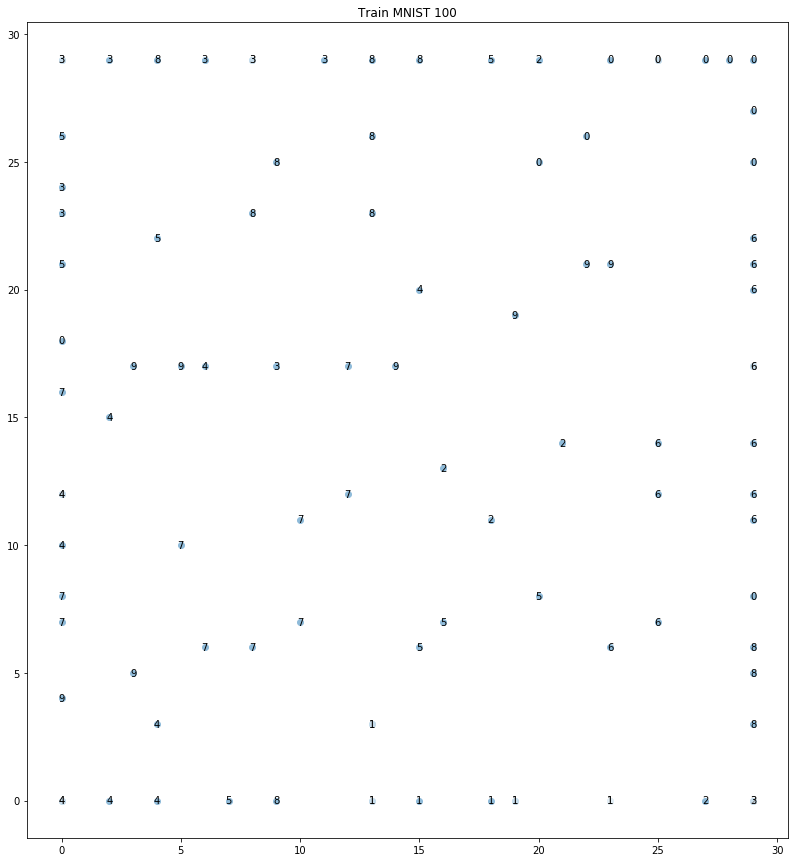

In [12]:
plt.figure(1, figsize=(30,15))
plt.subplot(121)
plt.scatter(x1,y1)
for i, m in enumerate(mapped):
    plt.text( m[0], m[1],index[i], ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.title('Train MNIST 100')

# **Teste 1 - 30 x 30**

In [0]:
centroids = som.get_centroids()

In [0]:
mappedtest = som.map_vects(x_test)
mappedtestarr = np.array(mappedtest)
x2 = mappedtestarr[:,0]
y2 = mappedtestarr[:,1]

index2 = [ np.where(r==1)[0][0] for r in y_test ]
index2 = list(map(str, index2))

In [0]:
y_test_pred = np.zeros((len(y_test), 10))

for i, m in enumerate(mappedtest):
  dists = []
  for j, n in enumerate(mapped):
    dist = math.sqrt((m[0]-n[0])**2) + ((m[1]-n[1])**2)
    dists.append([j, dist])
  
  dists = np.array(dists)
  pos = np.argmin(dists[:,1])
  pos_train = int(dists[pos, 0])
  # label predict
  y_test_pred[i] = y_train[pos_train]

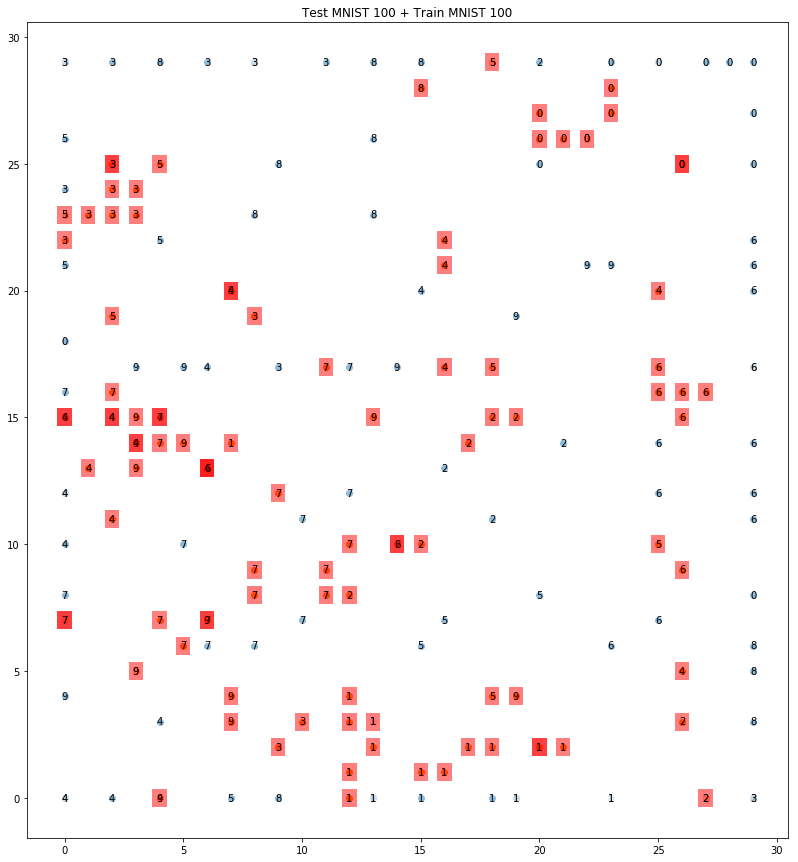

In [16]:
plt.figure(1, figsize=(30, 15))
plt.subplot(121)
# Plot 2: Training + Testing
plt.scatter(x1,y1)
# Just adding text
for i, m in enumerate(mapped):
    plt.text( m[0], m[1],index[i], ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, lw=0))

plt.scatter(x2,y2)
# Just adding text
for i, m in enumerate(mappedtest):
    plt.text( m[0], m[1],index2[i], ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5, lw=0))
plt.title('Test MNIST 100 + Train MNIST 100')

plt.show()

# **Confusion Matrix** 30 x 30

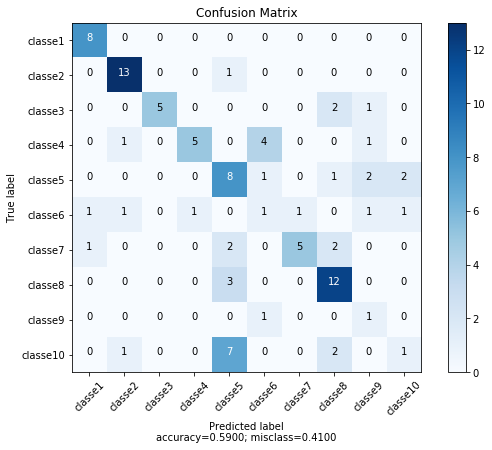

In [17]:
y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_test_pred ]

cm =confusion_matrix(y_test_non_category, y_predict_non_category)

plot_confusion_matrix(cm, normalize=False, target_names=classes, title="Confusion Matrix")

# **Treinamento 2 - 50 x 50**

In [12]:
som = SOM(50, 50, x_train.shape[1], 200)
som.train(x_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [0]:
mapped = som.map_vects(x_train)
mappedarr = np.array(mapped)
# coordenadas
x1 = mappedarr[:,0]; y1 = mappedarr[:,1]

# valor esperado
index = [ np.where(r==1)[0][0] for r in y_train ]
index = list(map(str, index))

Text(0.5, 1.0, 'Train MNIST 100')

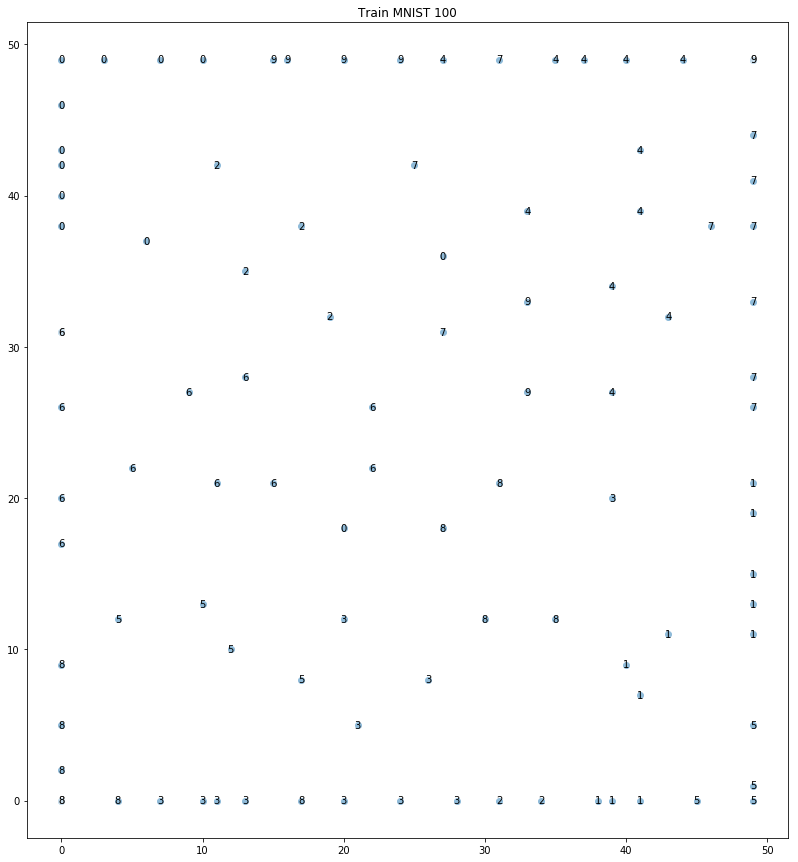

In [14]:
plt.figure(1, figsize=(30,15))
plt.subplot(121)
plt.scatter(x1,y1)
for i, m in enumerate(mapped):
    plt.text( m[0], m[1],index[i], ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.title('Train MNIST 100')

# **Teste 2 - 50 x 50**

In [0]:
centroids = som.get_centroids()

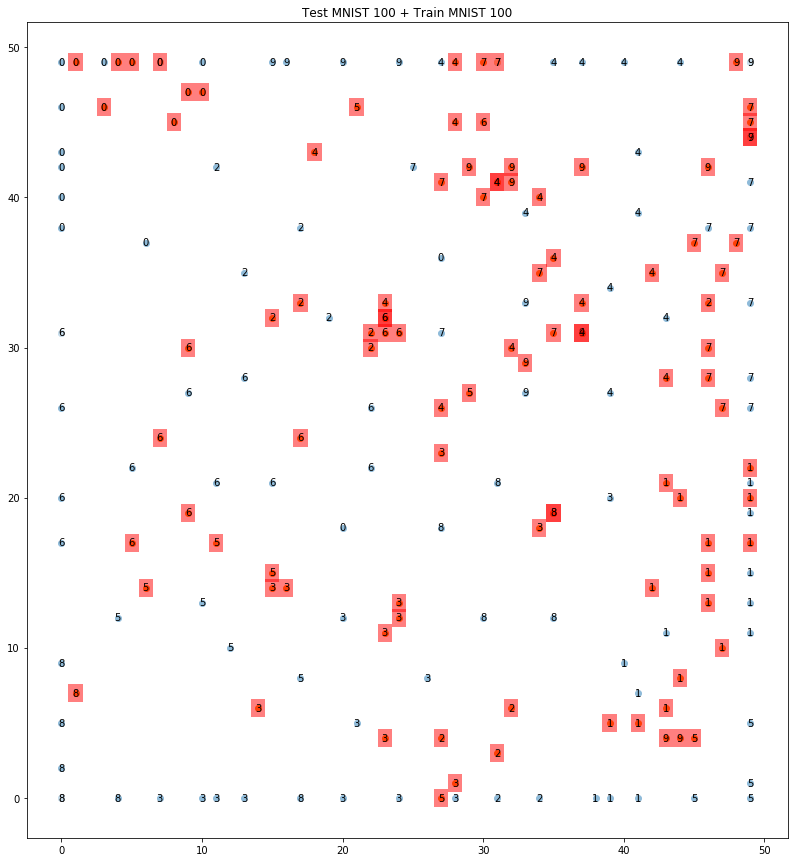

In [16]:
mappedtest = som.map_vects(x_test)
mappedtestarr = np.array(mappedtest)
x2 = mappedtestarr[:,0]
y2 = mappedtestarr[:,1]

index2 = [ np.where(r==1)[0][0] for r in y_test ]
index2 = list(map(str, index2))
y_test_pred = np.zeros((len(y_test), 10))

for i, m in enumerate(mappedtest):
  dists = []
  for j, n in enumerate(mapped):
    dist = math.sqrt((m[0]-n[0])**2) + ((m[1]-n[1])**2)
    dists.append([j, dist])
  
  dists = np.array(dists)
  pos = np.argmin(dists[:,1])
  pos_train = int(dists[pos, 0])
  # label predict
  y_test_pred[i] = y_train[pos_train]
  plt.figure(1, figsize=(30, 15))
  
plt.subplot(121)
# Plot 2: Training + Testing
plt.scatter(x1,y1)
# Just adding text
for i, m in enumerate(mapped):
    plt.text( m[0], m[1],index[i], ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, lw=0))

plt.scatter(x2,y2)
# Just adding text
for i, m in enumerate(mappedtest):
    plt.text( m[0], m[1],index2[i], ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5, lw=0))
plt.title('Test MNIST 100 + Train MNIST 100')

plt.show()

# **Confusion Matrix - 50 x 50**

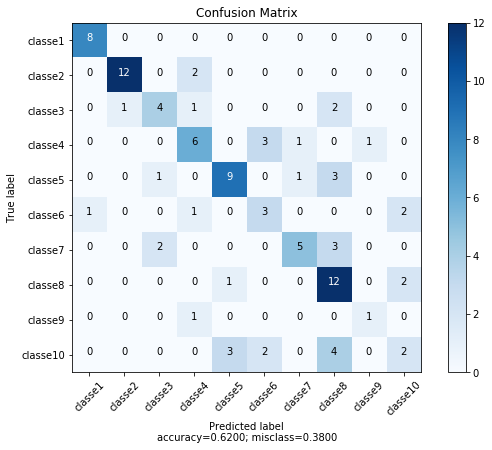

In [17]:
y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_test_pred ]

cm =confusion_matrix(y_test_non_category, y_predict_non_category)

plot_confusion_matrix(cm, normalize=False, target_names=classes, title="Confusion Matrix")

# **Treinamento 3 - 80 x 90**

In [0]:
som = SOM(80, 90, x_train.shape[1], 200)
som.train(x_train)

Text(0.5, 1.0, 'Train MNIST 100')

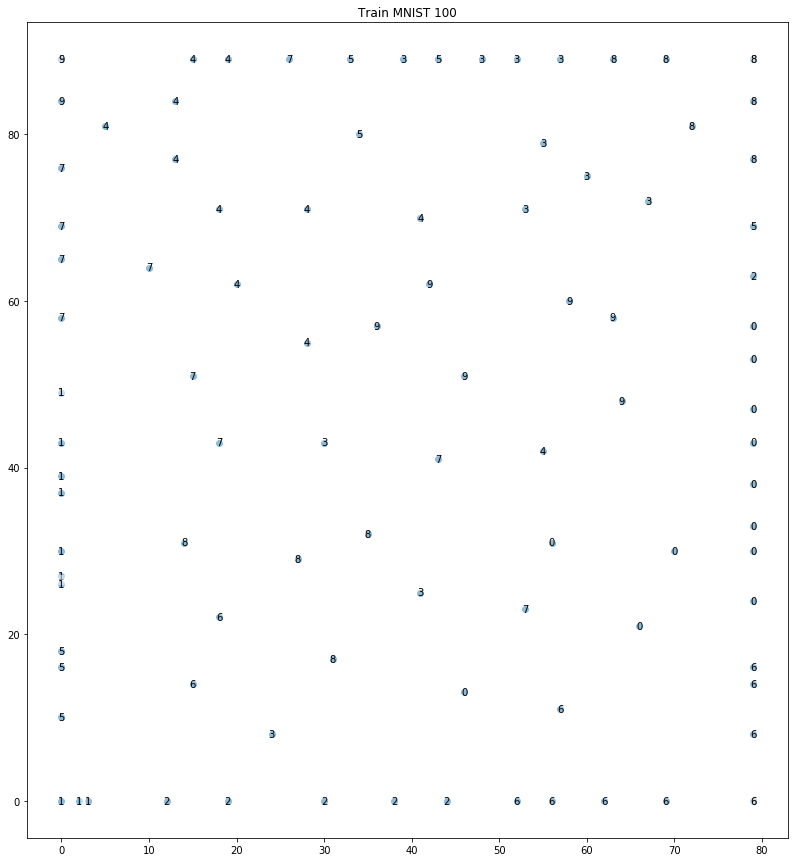

In [20]:
mapped = som.map_vects(x_train)
mappedarr = np.array(mapped)
# coordenadas
x1 = mappedarr[:,0]; y1 = mappedarr[:,1]

# valor esperado
index = [ np.where(r==1)[0][0] for r in y_train ]
index = list(map(str, index))
plt.figure(1, figsize=(30,15))
plt.subplot(121)
plt.scatter(x1,y1)
for i, m in enumerate(mapped):
    plt.text( m[0], m[1],index[i], ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))
plt.title('Train MNIST 100')

# **Teste 3 - 80 x 90**

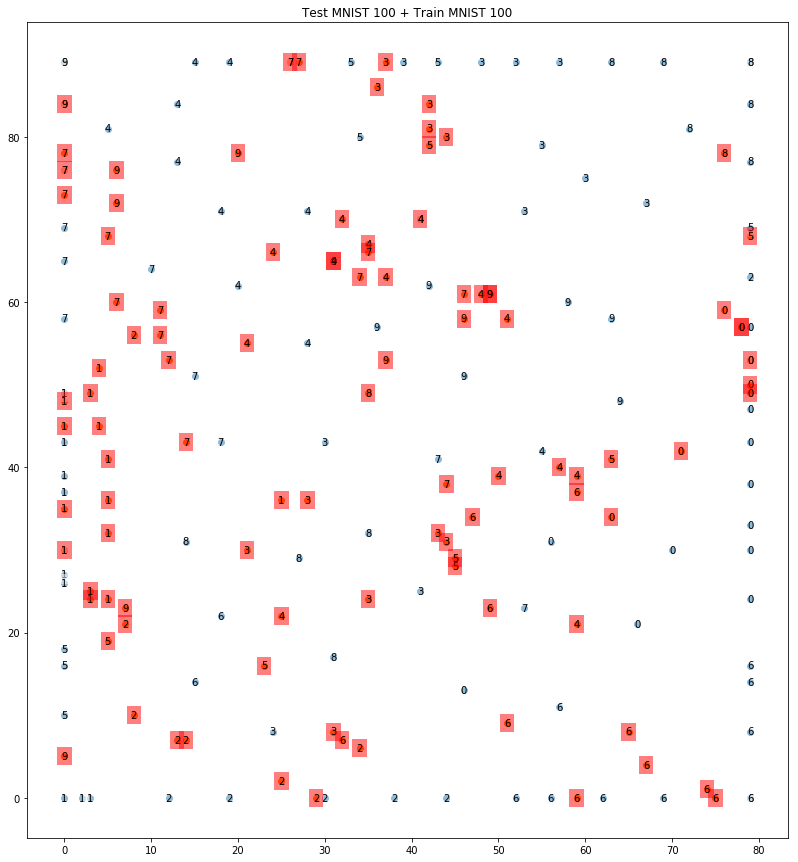

In [21]:
centroids = som.get_centroids()
mappedtest = som.map_vects(x_test)
mappedtestarr = np.array(mappedtest)
x2 = mappedtestarr[:,0]
y2 = mappedtestarr[:,1]

index2 = [ np.where(r==1)[0][0] for r in y_test ]
index2 = list(map(str, index2))
y_test_pred = np.zeros((len(y_test), 10))

for i, m in enumerate(mappedtest):
  dists = []
  for j, n in enumerate(mapped):
    dist = math.sqrt((m[0]-n[0])**2) + ((m[1]-n[1])**2)
    dists.append([j, dist])
  
  dists = np.array(dists)
  pos = np.argmin(dists[:,1])
  pos_train = int(dists[pos, 0])
  # label predict
  y_test_pred[i] = y_train[pos_train]
  plt.figure(1, figsize=(30, 15))
  
plt.subplot(121)
# Plot 2: Training + Testing
plt.scatter(x1,y1)
# Just adding text
for i, m in enumerate(mapped):
    plt.text( m[0], m[1],index[i], ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, lw=0))

plt.scatter(x2,y2)
# Just adding text
for i, m in enumerate(mappedtest):
    plt.text( m[0], m[1],index2[i], ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5, lw=0))
plt.title('Test MNIST 100 + Train MNIST 100')

plt.show()

# **Confusion Matrix 80 x 90**

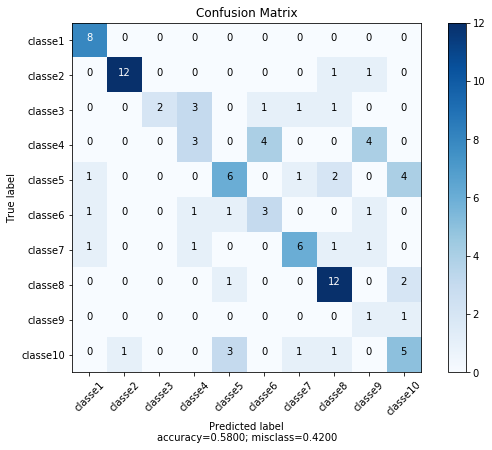

In [22]:
y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_test_pred ]

cm =confusion_matrix(y_test_non_category, y_predict_non_category)

plot_confusion_matrix(cm, normalize=False, target_names=classes, title="Confusion Matrix")